## Домашнее задание "Теория оптимизации".
**Задание.**
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

### Дополнительное задание.
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [7]:
import numpy as np
from scipy.optimize import differential_evolution

import matplotlib.pyplot as plt

In [8]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

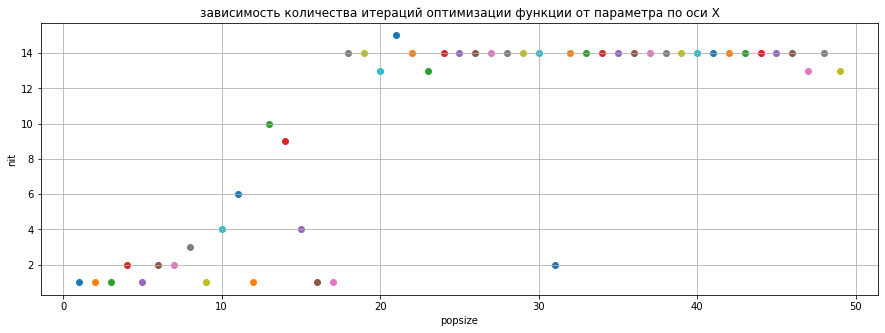

In [17]:
plt.figure(figsize=(15,5)) 
plt.xlabel('popsize')
plt.ylabel('nit')
plt.title('зависимость количества итераций оптимизации функции от параметра по оси Х')

for i in range(1,50):
    result = differential_evolution(ackley, bounds, popsize=i, mutation=(0.1, 0.1), recombination=1, 
                                  strategy='best1bin', tol=0.3, updating='immediate', seed=42)
    plt.scatter(i, result.nit)
plt.grid()
plt.show()

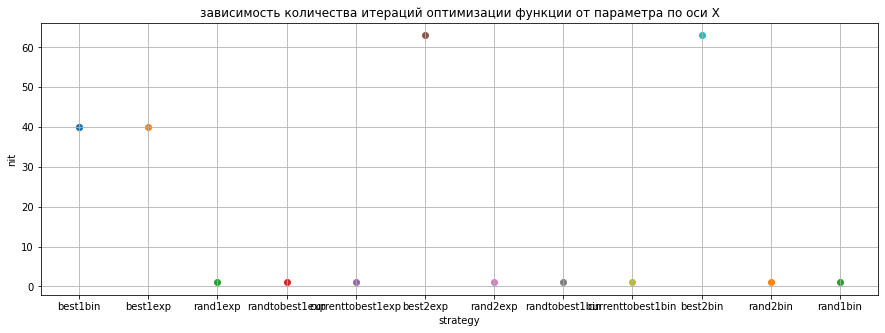

In [24]:
plt.figure(figsize=(15,5)) 
plt.xlabel('strategy')
plt.ylabel('nit')
plt.title('зависимость количества итераций оптимизации функции от параметра по оси Х')

strategy = ('best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 
            'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'best1bin', 'rand2bin', 'rand1bin')

for i in strategy:
    result = differential_evolution(ackley, bounds, popsize=15, mutation=(0.1, 1), recombination=1, 
                                    strategy=i, tol=0.3, updating='immediate', seed=42)
    plt.scatter(i, result.nit)
plt.grid()
plt.show()

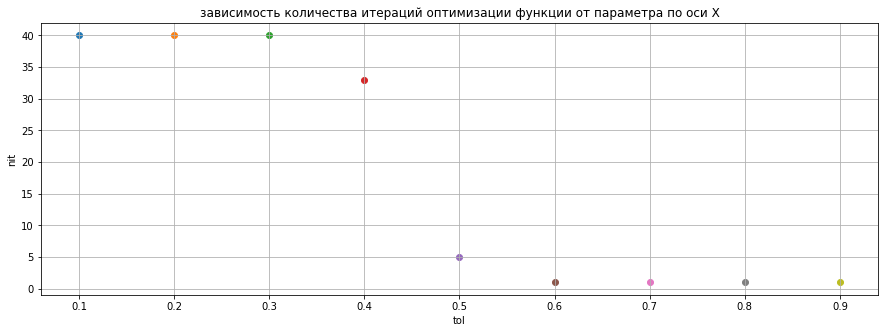

In [37]:
plt.figure(figsize=(15,5)) 
plt.xlabel('tol')
plt.ylabel('nit')
plt.title('зависимость количества итераций оптимизации функции от параметра по оси Х')

for i in range(1, 10, 1):
    result = differential_evolution(ackley, bounds, popsize=15, mutation=(0.1, 1), recombination=1, 
                                    strategy='best1bin', tol=(i/10), updating='immediate', seed=42)
    plt.scatter(i/10, result.nit)
plt.grid()
plt.show()

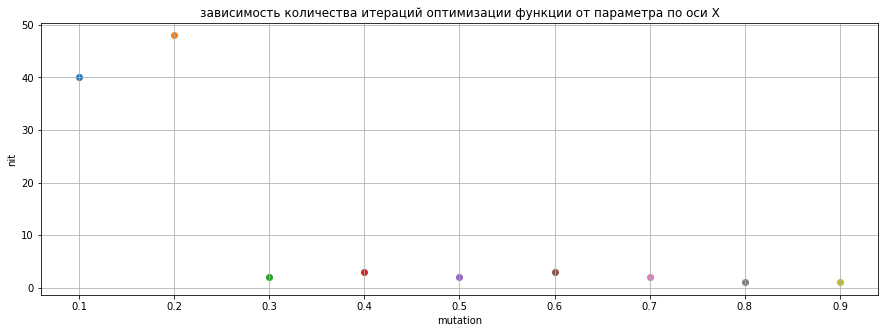

In [38]:
plt.figure(figsize=(15,5)) 
plt.xlabel('mutation')
plt.ylabel('nit')
plt.title('зависимость количества итераций оптимизации функции от параметра по оси Х')

for i in range(1, 10, 1):
    result = differential_evolution(ackley, bounds, popsize=15, mutation=(i/10, 1), recombination=1, 
                                    strategy='best1bin', tol=0.3, updating='immediate', seed=42)
    plt.scatter(i/10, result.nit)
plt.grid()
plt.show()

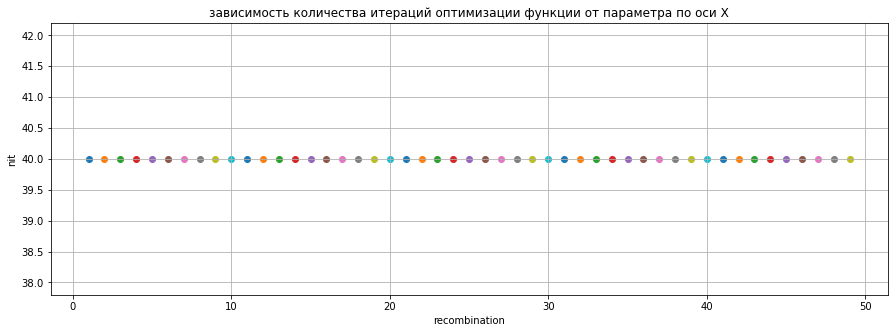

In [41]:
plt.figure(figsize=(15,5)) 
plt.xlabel('recombination')
plt.ylabel('nit')
plt.title('зависимость количества итераций оптимизации функции от параметра по оси Х')

for i in range(1,50):
    result = differential_evolution(ackley, bounds, popsize=15, mutation=(0.1, 1), recombination=i, 
                                    strategy='best1bin', tol=0.3, updating='immediate', seed=42)
    plt.scatter(i, result.nit)
plt.grid()
plt.show()

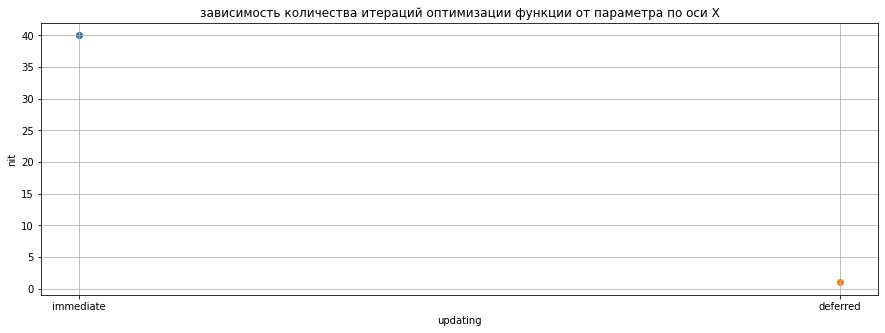

In [44]:
plt.figure(figsize=(15,5)) 
plt.xlabel('updating')
plt.ylabel('nit')
plt.title('зависимость количества итераций оптимизации функции от параметра по оси Х')

updating = ('immediate', 'deferred')

for i in updating:
    result = differential_evolution(ackley, bounds, popsize=15, mutation=(0.1, 1), recombination=1, 
                                  strategy='best1bin', tol=0.3, updating=i, seed=42)
    plt.scatter(i, result.nit)
plt.grid()
plt.show()